In [2]:
#Code partially borrowed with permission from Brent Komer and Ivana Kajic

#press Shift+Enter to run kernel
#press dd outside of cell to delete (very dangerous be careful!!!!)
#dir(Display) #directory of functions that can be used on variable (in this case Display)

import matplotlib.pyplot as plt
import nengo_spa as spa #imports Semantic Pointer Architecture
#import nengo.spa as spa #imports Semantic Pointer Architecture: old SPA 
import seaborn as sns
import pickle
import numpy as np #Numpy is life, can't do math without it
#import python_utils as utils

#special functions created by Nengo users to help with spatial semantic pointers
#from utils import encode_point, make_good_unitary, get_heatmap_vectors #for old spa
from utils import encode_point, make_good_unitary, get_heatmap_vectors 
import os
#import pygame
import string #to create list of letters
#plots images into Jupyter notebook
%matplotlib inline

In [3]:
with open('d_chars.pkl', 'rb') as f: #open files with only one rgb channel 
    d_chars_compact = pickle.load(f)
    
with open('d_chars_full.pkl', 'rb') as f: #open files with all rgb channels
    d_chars_full = pickle.load(f)

In [15]:
d_chars_flattened = d_chars_compact


(10000,)


TypeError: Invalid dimensions for image data

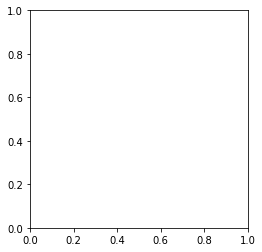

In [16]:
print(d_chars_flattened['A'].shape)
plt.imshow(d_chars_flattened['A'])
#plt.imshow(d_chars_full['A'])
#plt.imshow(d_chars_compact['A'])

In [6]:
from numpy.random import shuffle
from numpy.random import seed

digits =list(map(str,np.arange(1,10)))   #creates list of digits
letters = list(string.ascii_uppercase)   #creates list of letters
#print(digits)
#print(letters)
removedLetters = ['I','O','Q','S','Z'] #list of letters not used in O'Donnell & Wyble (in Prep)
list(map(letters.remove, removedLetters))  #removes letters not used in O'Donnell & Wyble (in Prep)


[None, None, None, None, None]

In [7]:
characters = []
characters.extend(letters)
characters.extend(digits)
print(characters)

num_chars = len(characters)
chars_matrix = []
#flattens matrix
for i in range(num_chars):
    d_chars_flattened['%s' %characters[i]] = d_chars_flattened['%s' %characters[i]].flatten()
    chars_matrix.append(d_chars_flattened['%s' %characters[i]])

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'R', 'T', 'U', 'V', 'W', 'X', 'Y', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [8]:
chars_matrix[0]
print(d_chars_flattened['A'].shape)

(10000,)


In [9]:
matrix_chars = np.array(chars_matrix)
matrix_chars.shape

(30, 10000)

In [10]:
#ONLY RUN ONCE

shuffle(letters)

In [18]:
from PIL import Image, ImageDraw, ImageFont #Creates display used in experiment

shuffle(digits)
Stimuli = ['5','7','C','3']
#Stimuli = [letters[0],digits[0],digits[1],digits[2]]
#shuffle(Stimuli) #randomizes where stimuli go on screen
print(Stimuli) #checks to confirm stims should go in right location

image_x = 100*2
image_y = 100*2
font_size = 100

TopLeft_Loc = (image_x/4-font_size/2,(image_y/4-font_size/2)) 
TopRight_Loc =(image_x*.75-font_size/2,image_y/4-font_size/2)  
BottomLeft_Loc =(image_x/4-font_size/2,image_y*.75-font_size/2) 
BottomRight_Loc = (image_x*.75-font_size/2,image_y*.75-font_size/2)

Display = Image.new('RGB', (image_x, image_y), color = (127,127,127))
fnt = ImageFont.truetype('arial.ttf',font_size)

#FixCross = ImageDraw.Draw(Display)
TopLeft = ImageDraw.Draw(Display)
TopRight = ImageDraw.Draw(Display)
BottomRight = ImageDraw.Draw(Display)
BottomLeft = ImageDraw.Draw(Display)


#FixCross.text(((image_x/2-font_size/2),(image_y/2-font_size/2)), "+",font=fnt, fill=(0,0,0))
TopLeft.text((image_x/4-font_size/2,(image_y/4-font_size/2)), Stimuli[0],font=fnt, fill=(0,0,0))
TopRight.text((image_x*.75-font_size/2,image_y/4-font_size/2), Stimuli[1],font=fnt,fill=(0,0,0))
BottomLeft.text((image_x/4-font_size/2,image_y*.75-font_size/2), Stimuli[2],font=fnt,fill=(0,0,0))
BottomRight.text((image_x*.75-font_size/2,image_y*.75-font_size/2), Stimuli[3],font=fnt,fill=(0,0,0))


#Display.save('pil_fixCross4.png') saves image as png (not necessary right now)


['6', '7', 'C', '3']


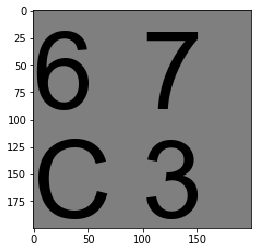

In [19]:
arr = np.array(Display) #converts display to array
plt.imshow(arr) #displays image as array

In [17]:
#print(arr)
#print(d_chars_flattened['1'])

In [18]:
TopLeft_flatten = arr[:100,:100,0].flatten()
BottomLeft_flatten = arr[100:201,:100   ,0].flatten()
TopRight_flatten = arr[:100   ,100:201,0].flatten()
BottomRight_flatten =arr[100:201,100:201,0].flatten()

TopLeft_flatten.shape
# scannerTL = np.dot(d_chars_flattened['1'],arr[:100   ,:100    ,0])
# scannerTR = np.dot(d_chars_flattened['1'],arr[100:201,:100   ,0])
# scannerBL = np.dot(d_chars_flattened['1'],arr[:100   ,100:201,0])
# scannerBR = np.dot(d_chars_flattened['1'],arr[100:201,100:201,0])


(10000,)

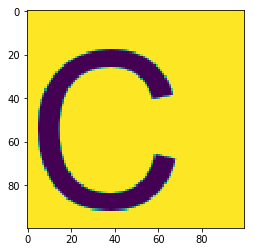

In [19]:
plt.imshow(arr[100:201,:100   ,0])

In [21]:
norms = np.linalg.norm(matrix_chars, axis=1)
matrix = matrix_chars/norms[:, np.newaxis]

In [26]:
#compute dot product


scannerTL = np.dot(matrix,TopLeft_flatten.T)
#scannerTL = (matrix*TopLeft_flatten.T)
scannerTR = np.dot(matrix,TopRight_flatten.T)
scannerBL = np.dot(matrix,BottomLeft_flatten.T)
scannerBR = np.dot(matrix,BottomRight_flatten.T)

print(scannerTL)
print(scannerTL.shape)
indexTL = np.argmax(scannerTL)
indexTR = np.argmax(scannerTR)
indexBL = np.argmax(scannerBL)
indexBR = np.argmax(scannerBR)

scanned_chars = [characters[indexTL],characters[indexTR],characters[indexBL],characters[indexBR]]
print([indexTL,indexTR,indexBL,indexBR])
print(scanned_chars)

[10375.69789049 10740.18697514 10653.24299281 10642.85271375
 10865.32510739 10949.13771906 10427.28673076 10427.99253078
 10880.06304928 10632.31117433 10985.04026339 10120.67906161
 10437.09453146 10707.89580492 10568.10674115 10630.68550311
 10453.01969955 10586.81152731  9718.98023651 10427.29473902
 10514.34560804 10700.24071814 10824.1269387  11242.7075326
 10588.94219752 11573.52224612 11372.76257455 10734.79120771
 11203.38407563 11102.3837203 ]
(30,)
[25, 27, 2, 23]
['5', '7', 'C', '3']


In [23]:
seed = 13  
dim = 512  #Dimensions of vectors for pixel "in depth"
limit = 5  #bound of cartesian space
res = image_x #resolution of image, currently set to be size of image itself

vmin=-1
vmax=1
cmap='plasma'

xs = np.linspace(-limit, limit, res) #generates x axis from -5:5
ys = np.linspace(-limit, limit, res) #generates y axis from -5:5

In [24]:
x_axis_sp = make_good_unitary(dim) #creates semantic pointers along the x axis with dim dimensions (512)
y_axis_sp = make_good_unitary(dim) #creates semantic pointers along the y axis with dim dimensions (512)

dot = np.dot(y_axis_sp.v, x_axis_sp.v) #takes dot product of vectors of semantic points

while dot > 0.05:  #control while loop to make x and y more orthogonal
    y_axis_sp = make_good_unitary(dim)
    dot = np.dot(y_axis_sp.v, x_axis_sp.v)

In [25]:
#ONLY NEEDS TO RUN ONCE; but maybe not!
#takes a while to complete
heatmap_vectors = get_heatmap_vectors(xs, ys, x_axis_sp, y_axis_sp) #builds vector for every point in space

In [27]:
#Debugging code, provides size of heatmap_vectors
heatmap_vectors.shape  # res, res, dim  (256,256,512)

(200, 200, 512)

In [28]:
Stim_Locs = [TopLeft_Loc,TopRight_Loc,BottomLeft_Loc,BottomRight_Loc,]

print(Stim_Locs)

[(0.0, 0.0), (100.0, 0.0), (0.0, 100.0), (100.0, 100.0)]


In [29]:
arr.shape #shape of arr matrix
#xid, yid = np.where(arr[:,:,0] == 0)  #sets filter of interest, currently "looking" for black pixels
xid, yid = [(Stim_Locs[0][0]+50,Stim_Locs[1][0]+50,Stim_Locs[2][0]+50,Stim_Locs[3][0]+50),
            (Stim_Locs[0][1]+50,Stim_Locs[1][1]+50,Stim_Locs[2][1]+50,Stim_Locs[3][1]+50)]


print(xid) #tests to see if above code is working
print(yid)
len(xid) #length of xid

(50.0, 150.0, 50.0, 150.0)
(50.0, 50.0, 150.0, 150.0)


4

In [30]:
vocab = spa.Vocabulary(dim)

#spa_Characters  'A;B;C;D;E;F;G;H;J;K;L;M;N;P;R;T;U;V;W;X;Y;N1;N2;N3;N4;N5;N6;N7;N8;N9;ITEM;CATEGORY;LETTER;DIGIT;'
#size_vocab = len(spa_Characters)
#vocab_vectors = np.zeros((size_vocab, dim))
embedder_names = ['EA','EB','EC','ED','EE','EF','EG','EH','EJ','EK','EL','EM','EN','EP','ER','ET','EU','EV','EW','EX','EY',
                  'EN1','EN2','EN3','EN4','EN5','EN6','EN7','EN8','EN9']
lettersN = ['A','B','C','D','E','F','G','H','J','K','L','M','N','P','R','T','U','V','W','X','Y']
digitsN = ['N1','N2','N3','N4','N5','N6','N7','N8','N9',]
Category = ['ITEM','CATEGORY','LETTER','DIGIT']

num_chars = len(embedder_names)

print(('%s = %s * ITEM + LETTER * CATEGORY') %(embedder_names[0],lettersN[0]))

        

EA = A * ITEM + LETTER * CATEGORY


In [31]:
#ctrl+'/' to comment in and out code
embeddings = []

for i in range(num_chars):
    if i <21:
        embeddings.append('%s = %s * ITEM + LETTER * CATEGORY' %(embedder_names[i],lettersN[i]))
    else:
        embeddings.append('%s = %s * ITEM + DIGIT * CATEGORY' %(embedder_names[i],digitsN[i-21]))
        
print(embeddings)
len(embeddings)

['EA = A * ITEM + LETTER * CATEGORY', 'EB = B * ITEM + LETTER * CATEGORY', 'EC = C * ITEM + LETTER * CATEGORY', 'ED = D * ITEM + LETTER * CATEGORY', 'EE = E * ITEM + LETTER * CATEGORY', 'EF = F * ITEM + LETTER * CATEGORY', 'EG = G * ITEM + LETTER * CATEGORY', 'EH = H * ITEM + LETTER * CATEGORY', 'EJ = J * ITEM + LETTER * CATEGORY', 'EK = K * ITEM + LETTER * CATEGORY', 'EL = L * ITEM + LETTER * CATEGORY', 'EM = M * ITEM + LETTER * CATEGORY', 'EN = N * ITEM + LETTER * CATEGORY', 'EP = P * ITEM + LETTER * CATEGORY', 'ER = R * ITEM + LETTER * CATEGORY', 'ET = T * ITEM + LETTER * CATEGORY', 'EU = U * ITEM + LETTER * CATEGORY', 'EV = V * ITEM + LETTER * CATEGORY', 'EW = W * ITEM + LETTER * CATEGORY', 'EX = X * ITEM + LETTER * CATEGORY', 'EY = Y * ITEM + LETTER * CATEGORY', 'EN1 = N1 * ITEM + DIGIT * CATEGORY', 'EN2 = N2 * ITEM + DIGIT * CATEGORY', 'EN3 = N3 * ITEM + DIGIT * CATEGORY', 'EN4 = N4 * ITEM + DIGIT * CATEGORY', 'EN5 = N5 * ITEM + DIGIT * CATEGORY', 'EN6 = N6 * ITEM + DIGIT * CATEG

30

In [32]:
spa_Characters = ";".join(lettersN+digitsN+Category+embeddings) #joins string lists together to populate spa.vocabulary
print(spa_Characters)
vocab.populate(spa_Characters) #not working currently; error: populate() missing 1 required positional argument: 'pointers'

A;B;C;D;E;F;G;H;J;K;L;M;N;P;R;T;U;V;W;X;Y;N1;N2;N3;N4;N5;N6;N7;N8;N9;ITEM;CATEGORY;LETTER;DIGIT;EA = A * ITEM + LETTER * CATEGORY;EB = B * ITEM + LETTER * CATEGORY;EC = C * ITEM + LETTER * CATEGORY;ED = D * ITEM + LETTER * CATEGORY;EE = E * ITEM + LETTER * CATEGORY;EF = F * ITEM + LETTER * CATEGORY;EG = G * ITEM + LETTER * CATEGORY;EH = H * ITEM + LETTER * CATEGORY;EJ = J * ITEM + LETTER * CATEGORY;EK = K * ITEM + LETTER * CATEGORY;EL = L * ITEM + LETTER * CATEGORY;EM = M * ITEM + LETTER * CATEGORY;EN = N * ITEM + LETTER * CATEGORY;EP = P * ITEM + LETTER * CATEGORY;ER = R * ITEM + LETTER * CATEGORY;ET = T * ITEM + LETTER * CATEGORY;EU = U * ITEM + LETTER * CATEGORY;EV = V * ITEM + LETTER * CATEGORY;EW = W * ITEM + LETTER * CATEGORY;EX = X * ITEM + LETTER * CATEGORY;EY = Y * ITEM + LETTER * CATEGORY;EN1 = N1 * ITEM + DIGIT * CATEGORY;EN2 = N2 * ITEM + DIGIT * CATEGORY;EN3 = N3 * ITEM + DIGIT * CATEGORY;EN4 = N4 * ITEM + DIGIT * CATEGORY;EN5 = N5 * ITEM + DIGIT * CATEGORY;EN6 = N6 * ITEM

In [ ]:
#test to make sure embeddings work
#vocab['EN1']

In [33]:
print([embedder_names[indexTL],embedder_names[indexTR],embedder_names[indexBL],embedder_names[indexBR]])
print(scanned_chars)

['EN5', 'EN7', 'EC', 'EN3']
['5', '7', 'C', '3']


In [34]:
#vector = np.random.uniform(-1,1,(dim))
#What is used starts here###
#pt = spa.SemanticPointer(data=vector) #creates single semantic pointer of length dim
#pt=pt.normalized()
#access vector with pt.v
Stimuli_pointers = [embedder_names[indexTL],embedder_names[indexTR],embedder_names[indexBL],embedder_names[indexBR]]
mem = spa.SemanticPointer(np.zeros(dim)) #
#points = zip(xs[xid], ys[yid], [0,1,2,3]) #takes two arrays and zips them together; goes thru x and y in parallel
#chnage points to be 4 points of test

#for x, y,obj in points:
for j in range(4):
    pos = encode_point(xs[int(xid[j])], ys[int(yid[j])], x_axis_sp, y_axis_sp)
    mem += pos*vocab[Stimuli_pointers[j]] #change point to vocab['EA']

# mem.normalize()
decoded_vec = mem*~(vocab['CATEGORY']*vocab['LETTER'])
#decoded_vec = mem*~(spa.sym.LETTER)
#decoded_vec = mem*~spa.sym.CATEGORY

Text(0, 0.5, 'y-axis')

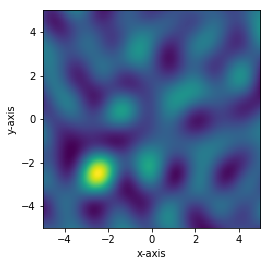

In [35]:
vs = np.tensordot(decoded_vec.v, heatmap_vectors, axes=([0], [2]))
plt.imshow(vs.T,origin='upper',extent=(xs[0], xs[-1], ys[0], ys[-1]))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
#vectorized dot product of 512 vector with lxW image_x X image_y and depth (dim) of 256
#works if A is in top left, check for TopRight,BottomLeft,BottomRight